In [2]:
import cv2
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [3]:
train_dir = "/home/taufik/Desktop/SignLanguage/Sign-Language-to-Text/data/train"

from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in tqdm(os.listdir(folder +"/"+folderName)):
                img_file = cv2.imread(folder +"/"+ folderName + "/" + image_filename)
                if img_file is not None:
                #     img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X_train, y_train = get_data(train_dir) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2) 




100%|███████████████████████████████████████| 800/800 [00:00<00:00, 1194.36it/s]


In [4]:
X_test.shape

(4160, 150, 150, 3)

In [5]:
classes = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

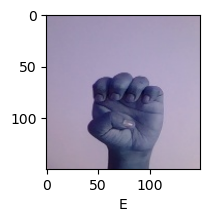

In [36]:
plot_sample(X_train, y_train, 0)

In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150,150, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(26, activation='softmax')
])

In [12]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
520/520 [==============================] - 604s 1s/step - loss: 9.8010 - accuracy: 0.9240
Epoch 2/10
520/520 [==============================] - 690s 1s/step - loss: 0.0029 - accuracy: 0.9989
Epoch 3/10
520/520 [==============================] - 632s 1s/step - loss: 0.2450 - accuracy: 0.9777
Epoch 4/10
520/520 [==============================] - 634s 1s/step - loss: 0.0038 - accuracy: 0.9990
Epoch 5/10
520/520 [==============================] - 705s 1s/step - loss: 0.0016 - accuracy: 0.9997
Epoch 6/10
520/520 [==============================] - 677s 1s/step - loss: 1.7296e-05 - accuracy: 1.0000
Epoch 7/10
520/520 [==============================] - 636s 1s/step - loss: 6.3227e-06 - accuracy: 1.0000
Epoch 8/10
520/520 [==============================] - 613s 1s/step - loss: 4.5188e-06 - accuracy: 1.0000
Epoch 9/10
520/520 [==============================] - 614s 1s/step - loss: 3.3436e-06 - accuracy: 1.0000
Epoch 10/10
520/520 [==============================] - 612s 1s/step - loss:

In [14]:
cnn.evaluate(X_test,y_test)

130/130 [==============================] - 35s 264ms/step - loss: 1.3904e-04 - accuracy: 1.0000


[0.0001390424877172336, 1.0]

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

130/130 [==============================] - 39s 295ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       149
           2       1.00      1.00      1.00       161
           3       1.00      1.00      1.00       139
           4       1.00      1.00      1.00       154
           5       1.00      1.00      1.00       159
           6       1.00      1.00      1.00       157
           7       1.00      1.00      1.00       162
           8       1.00      1.00      1.00       137
           9       1.00      1.00      1.00       156
          10       1.00      1.00      1.00       153
          11       1.00      1.00      1.00       155
          12       1.00      1.00      1.00       170
          13       1.00      1.00      1.00       180
          14       1.00      1.00      1.00       163
          15       1.00      1.00      1.00       17

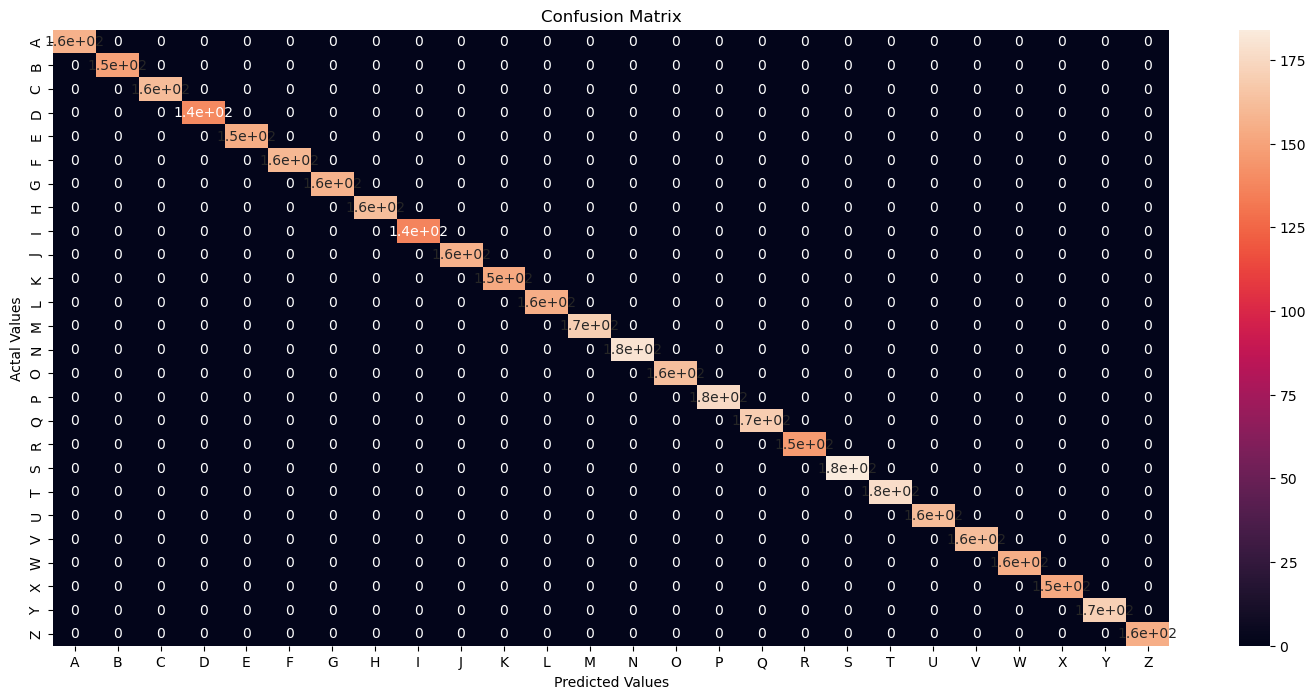

In [67]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_classes)
cm_df = pd.DataFrame(cm,index = classes,columns = classes)  
                     
                             
plt.figure(figsize=(18,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
# from sklearn.metrics import multilabel_confusion_matrix
# y_unique = classes
# mcm = multilabel_confusion_matrix(y_test, y_pred_classes, labels = y_unique)
# mcm
# disp.plot()

# plt.show()

In [18]:
# Saving the model
model_json = cnn.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
cnn.save_weights('model-bw.h5')
print('Weights saved')

Model Saved
Weights saved


In [46]:
classes[np.argmax(y_pred[1199])]

'H'

In [47]:
classes[y_test[1199]]

'H'